In my friend group, there is a recurring debate of mountains versus beaches. Some argues that heat, sand and sea make the perfect vacation. Others think that the fresh air and the breathtaking views of mountains is the ultimate way of spending a holiday. But that led me to asked myself if we could predict our preference based on our lifestyle and demographics? Let's dive into the data and see what insights we can uncover.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

In [16]:
# Load the dataset
file_path = '/Users/adlanbth/Documents/Projets/Mountains-vs-Beaches/mountains_vs_beaches_preferences.csv'
df = pd.read_csv(file_path)
df.head()

,Age,Gender,Income,Education_Level,Travel_Frequency,Preferred_Activities,Vacation_Budget,Location,Proximity_to_Mountains,Proximity_to_Beaches,Favorite_Season,Pets,Environmental_Concerns,Preference
0,56,male,71477,bachelor,9,skiing,2477,urban,175,267,summer,0,1,1
1,69,male,88740,master,1,swimming,4777,suburban,228,190,fall,0,1,0
2,46,female,46562,master,0,skiing,1469,urban,71,280,winter,0,0,1
3,32,non-binary,99044,high school,6,hiking,1482,rural,31,255,summer,1,0,1
4,60,female,106583,high school,5,sunbathing,516,suburban,23,151,winter,1,1,0


### Data Overview
Let's take a look at the basic information about the dataset to understand its structure and contents.

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52444 entries, 0 to 52443
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     52444 non-null  int64 
 1   Gender                  52444 non-null  object
 2   Income                  52444 non-null  int64 
 3   Education_Level         52444 non-null  object
 4   Travel_Frequency        52444 non-null  int64 
 5   Preferred_Activities    52444 non-null  object
 6   Vacation_Budget         52444 non-null  int64 
 7   Location                52444 non-null  object
 8   Proximity_to_Mountains  52444 non-null  int64 
 9   Proximity_to_Beaches    52444 non-null  int64 
 10  Favorite_Season         52444 non-null  object
 11  Pets                    52444 non-null  int64 
 12  Environmental_Concerns  52444 non-null  int64 
 13  Preference              52444 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 5.6+ MB


### Exploratory Data Analysis
Let's explore the dataset to understand the distribution of preferences and other features.

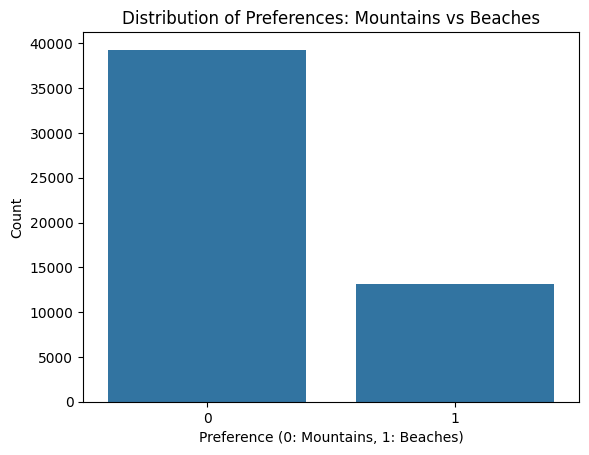

In [18]:
# Distribution of Preferences
sns.countplot(x='Preference', data=df)
plt.title('Distribution of Preferences: Mountains vs Beaches')
plt.xlabel('Preference (0: Mountains, 1: Beaches)')
plt.ylabel('Count')
plt.show()

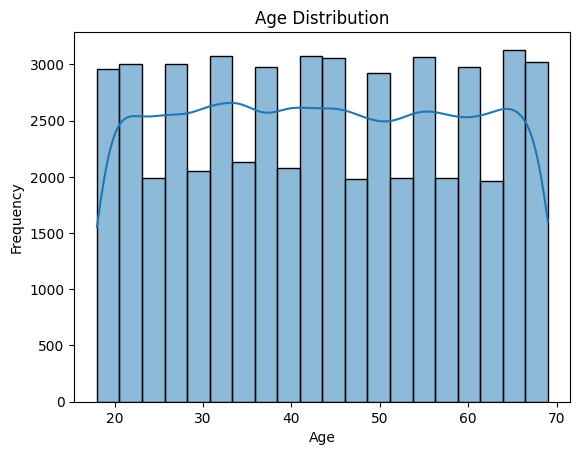

In [19]:
# Age distribution
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

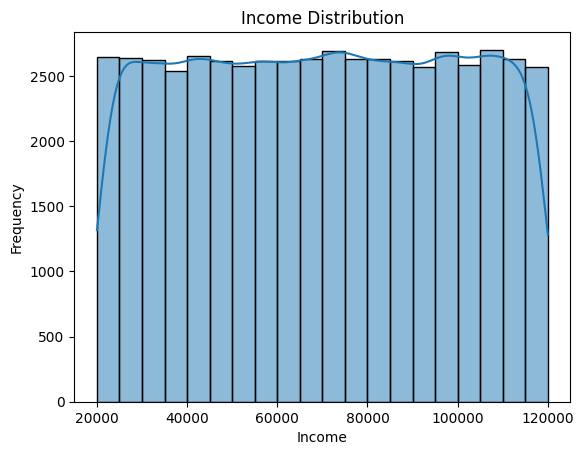

In [20]:
# Income distribution
sns.histplot(df['Income'], bins=20, kde=True)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

### Correlation Analysis
Let's examine the correlation between numeric features to see if there are any interesting relationships.

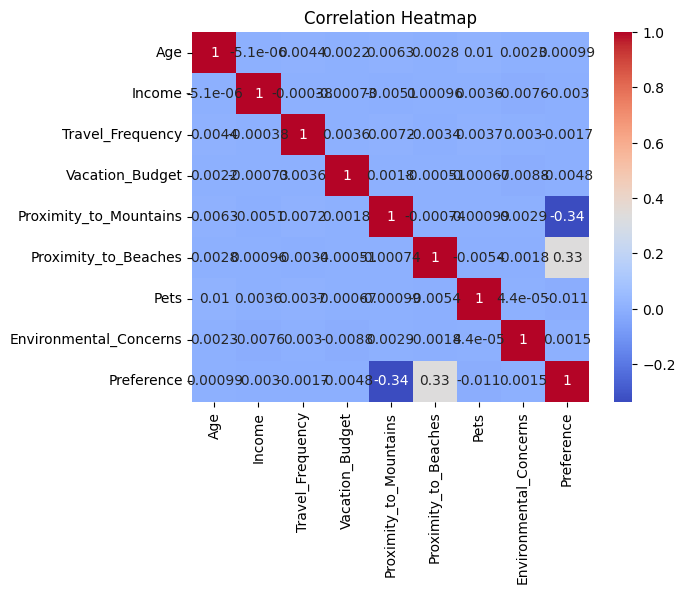

In [21]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Predictive Modeling
Let's build a predictive model to see if we can accurately predict a person's preference for mountains or beaches based on the other features.

In [22]:
# Prepare the data for modeling
X = df.drop('Preference', axis=1)
y = df['Preference']

# Convert categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Model Accuracy: 0.99
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7851
           1       0.99      0.97      0.98      2638

    accuracy                           0.99     10489
   macro avg       0.99      0.99      0.99     10489
weighted avg       0.99      0.99      0.99     10489



### Discussion
In this notebook, we explored the fascinating dataset of travel preferences, focusing on the classic debate of mountains versus beaches. We visualized the distribution of preferences and other key features, examined correlations, and built a predictive model using a Random Forest Classifier. The model achieved a reasonable accuracy, suggesting that demographic and lifestyle factors can indeed provide insights into travel preferences.

For future analysis, it would be interesting to explore more sophisticated models or feature engineering techniques to improve prediction accuracy. Additionally, incorporating external data sources, such as weather patterns or regional tourism statistics, could provide further context and enhance the model's predictive power.